In [98]:
import pandas as pd
import datetime
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [66]:
df1 = pd.read_csv('df1.csv', low_memory=False)

In [67]:
df1.Date = pd.to_datetime(df1['Date']).dt.to_period('M')

In [68]:
df1.head()

,Unnamed: 0,Price,Date,Postcode,Newbuild,Latitude,Longitude,District,Ward,Rural/urban,Altitude,LSOA Code,MSOA Code,Census output area,Constituency Code,Nearest station,Distance to station,Police force
0,0,59995,1995-10,SM6 7AG,Y,51.372557,-0.152311,Sutton,Wallington North,Urban major conurbation,29.0,E01004175,E02000849,E00021032,E14000621,Hackbridge,0.599323,Metropolitan Police
1,1,79995,1995-12,SM6 7AG,Y,51.372557,-0.152311,Sutton,Wallington North,Urban major conurbation,29.0,E01004175,E02000849,E00021032,E14000621,Hackbridge,0.599323,Metropolitan Police
2,2,84995,1995-12,SM6 7AG,Y,51.372557,-0.152311,Sutton,Wallington North,Urban major conurbation,29.0,E01004175,E02000849,E00021032,E14000621,Hackbridge,0.599323,Metropolitan Police
3,3,59995,1995-11,SM6 7AG,Y,51.372557,-0.152311,Sutton,Wallington North,Urban major conurbation,29.0,E01004175,E02000849,E00021032,E14000621,Hackbridge,0.599323,Metropolitan Police
4,4,79995,1995-12,SM6 7AG,Y,51.372557,-0.152311,Sutton,Wallington North,Urban major conurbation,29.0,E01004175,E02000849,E00021032,E14000621,Hackbridge,0.599323,Metropolitan Police


In [69]:
df2 = df1.drop(['Unnamed: 0','Police force','Postcode','Rural/urban','Ward','Census output area','Constituency Code','LSOA Code','MSOA Code'],axis=1,)

In [70]:
df2.head()

,Price,Date,Newbuild,Latitude,Longitude,District,Altitude,Nearest station,Distance to station
0,59995,1995-10,Y,51.372557,-0.152311,Sutton,29.0,Hackbridge,0.599323
1,79995,1995-12,Y,51.372557,-0.152311,Sutton,29.0,Hackbridge,0.599323
2,84995,1995-12,Y,51.372557,-0.152311,Sutton,29.0,Hackbridge,0.599323
3,59995,1995-11,Y,51.372557,-0.152311,Sutton,29.0,Hackbridge,0.599323
4,79995,1995-12,Y,51.372557,-0.152311,Sutton,29.0,Hackbridge,0.599323


In [71]:
labelencoder_X = LabelEncoder()
df2['Date'] = labelencoder_X.fit_transform(df2.Date)

In [72]:
df2=pd.get_dummies(df2, drop_first=True)

In [73]:
df2.head()

,Price,Date,Latitude,Longitude,Altitude,Distance to station,Newbuild_Y,District_Barnet,District_Bexley,District_Brent,...,Nearest station_Wood Street,Nearest station_Woodford,Nearest station_Woodgrange Park,Nearest station_Woodmansterne,Nearest station_Woodside,Nearest station_Woodside Park,Nearest station_Woolwich,Nearest station_Woolwich Arsenal,Nearest station_Woolwich Dockyard,Nearest station_Worcester Park
0,59995,9,51.372557,-0.152311,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79995,11,51.372557,-0.152311,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,84995,11,51.372557,-0.152311,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,59995,10,51.372557,-0.152311,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79995,11,51.372557,-0.152311,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
scaler = MinMaxScaler()
scaler.fit(df2[['Latitude','Longitude']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
df2[['Latitude','Longitude']]=scaler.transform(df2[['Latitude','Longitude']])

In [76]:
df2

,Price,Date,Latitude,Longitude,Altitude,Distance to station,Newbuild_Y,District_Barnet,District_Bexley,District_Brent,...,Nearest station_Wood Street,Nearest station_Woodford,Nearest station_Woodgrange Park,Nearest station_Woodmansterne,Nearest station_Woodside,Nearest station_Woodside Park,Nearest station_Woolwich,Nearest station_Woolwich Arsenal,Nearest station_Woolwich Dockyard,Nearest station_Worcester Park
0,59995,9,0.201917,0.422106,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79995,11,0.201917,0.422106,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,84995,11,0.201917,0.422106,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,59995,10,0.201917,0.422106,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79995,11,0.201917,0.422106,29.0,0.599323,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048213,940000,294,0.264730,0.295907,20.0,0.709245,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3048214,580000,294,0.281061,0.366305,19.0,0.269618,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3048215,525000,295,0.122978,0.472544,65.0,0.495768,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3048216,350000,295,0.231201,0.469940,41.0,0.754609,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df3 = df2[['Price','Date','Latitude','Longitude','Altitude','Distance to station']].reset_index(drop=True)

In [78]:
df3

,Price,Date,Latitude,Longitude,Altitude,Distance to station
0,59995,9,0.201917,0.422106,29.0,0.599323
1,79995,11,0.201917,0.422106,29.0,0.599323
2,84995,11,0.201917,0.422106,29.0,0.599323
3,59995,10,0.201917,0.422106,29.0,0.599323
4,79995,11,0.201917,0.422106,29.0,0.599323
...,...,...,...,...,...,...
3048213,940000,294,0.264730,0.295907,20.0,0.709245
3048214,580000,294,0.281061,0.366305,19.0,0.269618
3048215,525000,295,0.122978,0.472544,65.0,0.495768
3048216,350000,295,0.231201,0.469940,41.0,0.754609


In [79]:
X = df3.iloc[:,1:]
y = df3.Price

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
%%time
xgb = xgboost.XGBRegressor(max_depth=8, learning_rate=0.30, n_estimators=30, random_state =42)
xgb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Wall time: 1min 9s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=30,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [82]:
xgb_pred = xgb.predict(X_test)

In [83]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(RMSE.round(4))

112503.4104


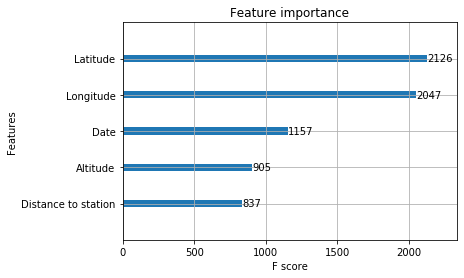

Wall time: 183 ms


In [84]:
%%time
from xgboost import plot_importance
plot_importance(xgb, max_num_features=10) # top 10 most important features
plt.show()

In [87]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
    }

In [88]:
dtrain = lgb.Dataset(X_train, label=y_train)
dvalid = lgb.Dataset(X_test, label=y_test)

In [89]:
model = lgb.train(params,
                       dtrain,
                       valid_sets=dvalid,
                       num_boost_round=5000,
                       early_stopping_rounds=200)

[1]	valid_0's l1: 134375	valid_0's l2: 3.2886e+10
Training until validation scores don't improve for 200 rounds
[2]	valid_0's l1: 130634	valid_0's l2: 3.1296e+10
[3]	valid_0's l1: 127169	valid_0's l2: 2.98592e+10
[4]	valid_0's l1: 123971	valid_0's l2: 2.85581e+10
[5]	valid_0's l1: 121014	valid_0's l2: 2.73835e+10
[6]	valid_0's l1: 118270	valid_0's l2: 2.63128e+10
[7]	valid_0's l1: 115752	valid_0's l2: 2.53472e+10
[8]	valid_0's l1: 113406	valid_0's l2: 2.44665e+10
[9]	valid_0's l1: 111226	valid_0's l2: 2.36642e+10
[10]	valid_0's l1: 109246	valid_0's l2: 2.29426e+10
[11]	valid_0's l1: 107416	valid_0's l2: 2.22885e+10
[12]	valid_0's l1: 105709	valid_0's l2: 2.16864e+10
[13]	valid_0's l1: 104120	valid_0's l2: 2.11386e+10
[14]	valid_0's l1: 102663	valid_0's l2: 2.06335e+10
[15]	valid_0's l1: 101293	valid_0's l2: 2.01798e+10
[16]	valid_0's l1: 100028	valid_0's l2: 1.97631e+10
[17]	valid_0's l1: 98856.6	valid_0's l2: 1.93877e+10
[18]	valid_0's l1: 97786.5	valid_0's l2: 1.90445e+10
[19]	valid_

[156]	valid_0's l1: 78389.2	valid_0's l2: 1.38267e+10
[157]	valid_0's l1: 78372.6	valid_0's l2: 1.38203e+10
[158]	valid_0's l1: 78353.9	valid_0's l2: 1.38143e+10
[159]	valid_0's l1: 78342.3	valid_0's l2: 1.38097e+10
[160]	valid_0's l1: 78323.6	valid_0's l2: 1.38046e+10
[161]	valid_0's l1: 78318	valid_0's l2: 1.38023e+10
[162]	valid_0's l1: 78276.9	valid_0's l2: 1.37915e+10
[163]	valid_0's l1: 78262.5	valid_0's l2: 1.37873e+10
[164]	valid_0's l1: 78250.2	valid_0's l2: 1.37835e+10
[165]	valid_0's l1: 78234.4	valid_0's l2: 1.37792e+10
[166]	valid_0's l1: 78220.6	valid_0's l2: 1.37752e+10
[167]	valid_0's l1: 78210.4	valid_0's l2: 1.37723e+10
[168]	valid_0's l1: 78197.9	valid_0's l2: 1.37683e+10
[169]	valid_0's l1: 78186.2	valid_0's l2: 1.37649e+10
[170]	valid_0's l1: 78176.6	valid_0's l2: 1.37622e+10
[171]	valid_0's l1: 78162.1	valid_0's l2: 1.37571e+10
[172]	valid_0's l1: 78142.6	valid_0's l2: 1.37508e+10
[173]	valid_0's l1: 78104.8	valid_0's l2: 1.37418e+10
[174]	valid_0's l1: 78084.2	va

[310]	valid_0's l1: 76319.9	valid_0's l2: 1.32216e+10
[311]	valid_0's l1: 76316.1	valid_0's l2: 1.32203e+10
[312]	valid_0's l1: 76302.5	valid_0's l2: 1.32159e+10
[313]	valid_0's l1: 76294	valid_0's l2: 1.3213e+10
[314]	valid_0's l1: 76291	valid_0's l2: 1.32121e+10
[315]	valid_0's l1: 76276.5	valid_0's l2: 1.32077e+10
[316]	valid_0's l1: 76271	valid_0's l2: 1.32062e+10
[317]	valid_0's l1: 76265.6	valid_0's l2: 1.32046e+10
[318]	valid_0's l1: 76258.3	valid_0's l2: 1.32022e+10
[319]	valid_0's l1: 76251.1	valid_0's l2: 1.32002e+10
[320]	valid_0's l1: 76237.5	valid_0's l2: 1.31972e+10
[321]	valid_0's l1: 76229.4	valid_0's l2: 1.31949e+10
[322]	valid_0's l1: 76218.1	valid_0's l2: 1.31919e+10
[323]	valid_0's l1: 76206.4	valid_0's l2: 1.31888e+10
[324]	valid_0's l1: 76198.3	valid_0's l2: 1.31863e+10
[325]	valid_0's l1: 76178.4	valid_0's l2: 1.31814e+10
[326]	valid_0's l1: 76165.7	valid_0's l2: 1.31771e+10
[327]	valid_0's l1: 76161.9	valid_0's l2: 1.3176e+10
[328]	valid_0's l1: 76152.9	valid_0'

[463]	valid_0's l1: 75136.4	valid_0's l2: 1.28749e+10
[464]	valid_0's l1: 75135.2	valid_0's l2: 1.28743e+10
[465]	valid_0's l1: 75134.3	valid_0's l2: 1.28737e+10
[466]	valid_0's l1: 75128.7	valid_0's l2: 1.28716e+10
[467]	valid_0's l1: 75125.5	valid_0's l2: 1.28705e+10
[468]	valid_0's l1: 75116.6	valid_0's l2: 1.28673e+10
[469]	valid_0's l1: 75113.2	valid_0's l2: 1.28667e+10
[470]	valid_0's l1: 75106.2	valid_0's l2: 1.28646e+10
[471]	valid_0's l1: 75105.6	valid_0's l2: 1.28641e+10
[472]	valid_0's l1: 75105	valid_0's l2: 1.28637e+10
[473]	valid_0's l1: 75104.3	valid_0's l2: 1.28632e+10
[474]	valid_0's l1: 75104.1	valid_0's l2: 1.28629e+10
[475]	valid_0's l1: 75103.1	valid_0's l2: 1.28623e+10
[476]	valid_0's l1: 75095.1	valid_0's l2: 1.28604e+10
[477]	valid_0's l1: 75090.8	valid_0's l2: 1.28593e+10
[478]	valid_0's l1: 75084.4	valid_0's l2: 1.28574e+10
[479]	valid_0's l1: 75077.2	valid_0's l2: 1.28556e+10
[480]	valid_0's l1: 75073.4	valid_0's l2: 1.28547e+10
[481]	valid_0's l1: 75064	vali

[616]	valid_0's l1: 74270.4	valid_0's l2: 1.26228e+10
[617]	valid_0's l1: 74261.8	valid_0's l2: 1.262e+10
[618]	valid_0's l1: 74256	valid_0's l2: 1.26185e+10
[619]	valid_0's l1: 74248.7	valid_0's l2: 1.26164e+10
[620]	valid_0's l1: 74240	valid_0's l2: 1.26134e+10
[621]	valid_0's l1: 74232.7	valid_0's l2: 1.26116e+10
[622]	valid_0's l1: 74226.7	valid_0's l2: 1.26102e+10
[623]	valid_0's l1: 74221.3	valid_0's l2: 1.26087e+10
[624]	valid_0's l1: 74214.3	valid_0's l2: 1.26069e+10
[625]	valid_0's l1: 74208.9	valid_0's l2: 1.26046e+10
[626]	valid_0's l1: 74201	valid_0's l2: 1.26021e+10
[627]	valid_0's l1: 74188.6	valid_0's l2: 1.25994e+10
[628]	valid_0's l1: 74182.9	valid_0's l2: 1.25976e+10
[629]	valid_0's l1: 74172.1	valid_0's l2: 1.25944e+10
[630]	valid_0's l1: 74163.7	valid_0's l2: 1.2593e+10
[631]	valid_0's l1: 74157.9	valid_0's l2: 1.25908e+10
[632]	valid_0's l1: 74152.7	valid_0's l2: 1.25893e+10
[633]	valid_0's l1: 74139.6	valid_0's l2: 1.25863e+10
[634]	valid_0's l1: 74131.5	valid_0's

[769]	valid_0's l1: 73473.1	valid_0's l2: 1.23919e+10
[770]	valid_0's l1: 73471.3	valid_0's l2: 1.23912e+10
[771]	valid_0's l1: 73461.3	valid_0's l2: 1.23882e+10
[772]	valid_0's l1: 73456.7	valid_0's l2: 1.23866e+10
[773]	valid_0's l1: 73449.9	valid_0's l2: 1.23844e+10
[774]	valid_0's l1: 73440.6	valid_0's l2: 1.23817e+10
[775]	valid_0's l1: 73436.2	valid_0's l2: 1.23801e+10
[776]	valid_0's l1: 73435	valid_0's l2: 1.23796e+10
[777]	valid_0's l1: 73434	valid_0's l2: 1.2379e+10
[778]	valid_0's l1: 73431.2	valid_0's l2: 1.23783e+10
[779]	valid_0's l1: 73430.6	valid_0's l2: 1.23779e+10
[780]	valid_0's l1: 73427.6	valid_0's l2: 1.23772e+10
[781]	valid_0's l1: 73423.5	valid_0's l2: 1.23754e+10
[782]	valid_0's l1: 73418.7	valid_0's l2: 1.23735e+10
[783]	valid_0's l1: 73418	valid_0's l2: 1.23732e+10
[784]	valid_0's l1: 73414.5	valid_0's l2: 1.23719e+10
[785]	valid_0's l1: 73413.7	valid_0's l2: 1.23716e+10
[786]	valid_0's l1: 73407.2	valid_0's l2: 1.23698e+10
[787]	valid_0's l1: 73406.4	valid_0

[925]	valid_0's l1: 72922.3	valid_0's l2: 1.2233e+10
[926]	valid_0's l1: 72916.7	valid_0's l2: 1.22312e+10
[927]	valid_0's l1: 72911.6	valid_0's l2: 1.22296e+10
[928]	valid_0's l1: 72905.5	valid_0's l2: 1.22275e+10
[929]	valid_0's l1: 72905.1	valid_0's l2: 1.22274e+10
[930]	valid_0's l1: 72900.5	valid_0's l2: 1.22263e+10
[931]	valid_0's l1: 72899.8	valid_0's l2: 1.22259e+10
[932]	valid_0's l1: 72899.2	valid_0's l2: 1.22255e+10
[933]	valid_0's l1: 72898.5	valid_0's l2: 1.22251e+10
[934]	valid_0's l1: 72896.8	valid_0's l2: 1.22242e+10
[935]	valid_0's l1: 72896.3	valid_0's l2: 1.22238e+10
[936]	valid_0's l1: 72895.8	valid_0's l2: 1.22236e+10
[937]	valid_0's l1: 72889.2	valid_0's l2: 1.2222e+10
[938]	valid_0's l1: 72887.7	valid_0's l2: 1.22215e+10
[939]	valid_0's l1: 72887.3	valid_0's l2: 1.22213e+10
[940]	valid_0's l1: 72882.4	valid_0's l2: 1.22193e+10
[941]	valid_0's l1: 72880.7	valid_0's l2: 1.22189e+10
[942]	valid_0's l1: 72878.9	valid_0's l2: 1.22185e+10
[943]	valid_0's l1: 72875.5	va

[1077]	valid_0's l1: 72410.8	valid_0's l2: 1.20893e+10
[1078]	valid_0's l1: 72409	valid_0's l2: 1.20887e+10
[1079]	valid_0's l1: 72405.2	valid_0's l2: 1.20879e+10
[1080]	valid_0's l1: 72403.3	valid_0's l2: 1.20873e+10
[1081]	valid_0's l1: 72399.3	valid_0's l2: 1.20863e+10
[1082]	valid_0's l1: 72394.8	valid_0's l2: 1.20853e+10
[1083]	valid_0's l1: 72391.6	valid_0's l2: 1.20845e+10
[1084]	valid_0's l1: 72387.8	valid_0's l2: 1.20838e+10
[1085]	valid_0's l1: 72381.1	valid_0's l2: 1.20822e+10
[1086]	valid_0's l1: 72376.7	valid_0's l2: 1.2081e+10
[1087]	valid_0's l1: 72376.5	valid_0's l2: 1.2081e+10
[1088]	valid_0's l1: 72373.4	valid_0's l2: 1.20799e+10
[1089]	valid_0's l1: 72370.3	valid_0's l2: 1.20788e+10
[1090]	valid_0's l1: 72366.6	valid_0's l2: 1.20781e+10
[1091]	valid_0's l1: 72364	valid_0's l2: 1.20772e+10
[1092]	valid_0's l1: 72357.4	valid_0's l2: 1.20752e+10
[1093]	valid_0's l1: 72351.3	valid_0's l2: 1.20732e+10
[1094]	valid_0's l1: 72349.9	valid_0's l2: 1.20728e+10
[1095]	valid_0's

[1230]	valid_0's l1: 71979.1	valid_0's l2: 1.19684e+10
[1231]	valid_0's l1: 71977.5	valid_0's l2: 1.19679e+10
[1232]	valid_0's l1: 71976.2	valid_0's l2: 1.19675e+10
[1233]	valid_0's l1: 71974	valid_0's l2: 1.19668e+10
[1234]	valid_0's l1: 71971.2	valid_0's l2: 1.19659e+10
[1235]	valid_0's l1: 71968.7	valid_0's l2: 1.19651e+10
[1236]	valid_0's l1: 71967.9	valid_0's l2: 1.19649e+10
[1237]	valid_0's l1: 71967.3	valid_0's l2: 1.19648e+10
[1238]	valid_0's l1: 71966.7	valid_0's l2: 1.19646e+10
[1239]	valid_0's l1: 71962	valid_0's l2: 1.19634e+10
[1240]	valid_0's l1: 71961.6	valid_0's l2: 1.19634e+10
[1241]	valid_0's l1: 71958.7	valid_0's l2: 1.19623e+10
[1242]	valid_0's l1: 71955.4	valid_0's l2: 1.19616e+10
[1243]	valid_0's l1: 71953.1	valid_0's l2: 1.19609e+10
[1244]	valid_0's l1: 71947.8	valid_0's l2: 1.19592e+10
[1245]	valid_0's l1: 71944.6	valid_0's l2: 1.19582e+10
[1246]	valid_0's l1: 71939.9	valid_0's l2: 1.1957e+10
[1247]	valid_0's l1: 71933.7	valid_0's l2: 1.19556e+10
[1248]	valid_0'

[1381]	valid_0's l1: 71605.1	valid_0's l2: 1.18613e+10
[1382]	valid_0's l1: 71599.2	valid_0's l2: 1.18596e+10
[1383]	valid_0's l1: 71595.9	valid_0's l2: 1.18587e+10
[1384]	valid_0's l1: 71589.7	valid_0's l2: 1.1857e+10
[1385]	valid_0's l1: 71586.6	valid_0's l2: 1.18562e+10
[1386]	valid_0's l1: 71581.8	valid_0's l2: 1.18549e+10
[1387]	valid_0's l1: 71579.3	valid_0's l2: 1.18542e+10
[1388]	valid_0's l1: 71574.3	valid_0's l2: 1.1853e+10
[1389]	valid_0's l1: 71571.1	valid_0's l2: 1.18522e+10
[1390]	valid_0's l1: 71568.8	valid_0's l2: 1.18516e+10
[1391]	valid_0's l1: 71567.9	valid_0's l2: 1.18514e+10
[1392]	valid_0's l1: 71563.2	valid_0's l2: 1.18495e+10
[1393]	valid_0's l1: 71562.8	valid_0's l2: 1.18495e+10
[1394]	valid_0's l1: 71559.5	valid_0's l2: 1.18481e+10
[1395]	valid_0's l1: 71558.6	valid_0's l2: 1.18479e+10
[1396]	valid_0's l1: 71556.6	valid_0's l2: 1.18473e+10
[1397]	valid_0's l1: 71555.9	valid_0's l2: 1.18467e+10
[1398]	valid_0's l1: 71554.4	valid_0's l2: 1.18462e+10
[1399]	valid

[1535]	valid_0's l1: 71231.4	valid_0's l2: 1.17533e+10
[1536]	valid_0's l1: 71229.3	valid_0's l2: 1.17525e+10
[1537]	valid_0's l1: 71227	valid_0's l2: 1.17518e+10
[1538]	valid_0's l1: 71224.9	valid_0's l2: 1.17513e+10
[1539]	valid_0's l1: 71222.4	valid_0's l2: 1.17509e+10
[1540]	valid_0's l1: 71221.8	valid_0's l2: 1.17508e+10
[1541]	valid_0's l1: 71216.3	valid_0's l2: 1.17491e+10
[1542]	valid_0's l1: 71216	valid_0's l2: 1.17489e+10
[1543]	valid_0's l1: 71210.8	valid_0's l2: 1.17474e+10
[1544]	valid_0's l1: 71210.6	valid_0's l2: 1.17473e+10
[1545]	valid_0's l1: 71206.8	valid_0's l2: 1.17463e+10
[1546]	valid_0's l1: 71202.9	valid_0's l2: 1.1745e+10
[1547]	valid_0's l1: 71199.5	valid_0's l2: 1.17441e+10
[1548]	valid_0's l1: 71194.9	valid_0's l2: 1.17427e+10
[1549]	valid_0's l1: 71191.9	valid_0's l2: 1.17418e+10
[1550]	valid_0's l1: 71188.3	valid_0's l2: 1.17409e+10
[1551]	valid_0's l1: 71186.3	valid_0's l2: 1.17405e+10
[1552]	valid_0's l1: 71180.9	valid_0's l2: 1.17392e+10
[1553]	valid_0'

[1686]	valid_0's l1: 70876.6	valid_0's l2: 1.16532e+10
[1687]	valid_0's l1: 70873.5	valid_0's l2: 1.16522e+10
[1688]	valid_0's l1: 70870.8	valid_0's l2: 1.16514e+10
[1689]	valid_0's l1: 70868.1	valid_0's l2: 1.16505e+10
[1690]	valid_0's l1: 70865.8	valid_0's l2: 1.16498e+10
[1691]	valid_0's l1: 70865.4	valid_0's l2: 1.16496e+10
[1692]	valid_0's l1: 70863.6	valid_0's l2: 1.16492e+10
[1693]	valid_0's l1: 70863.1	valid_0's l2: 1.1649e+10
[1694]	valid_0's l1: 70862.7	valid_0's l2: 1.16489e+10
[1695]	valid_0's l1: 70861	valid_0's l2: 1.16483e+10
[1696]	valid_0's l1: 70856.2	valid_0's l2: 1.16469e+10
[1697]	valid_0's l1: 70850.8	valid_0's l2: 1.16456e+10
[1698]	valid_0's l1: 70846.7	valid_0's l2: 1.16445e+10
[1699]	valid_0's l1: 70844.2	valid_0's l2: 1.1644e+10
[1700]	valid_0's l1: 70841.1	valid_0's l2: 1.16431e+10
[1701]	valid_0's l1: 70838.4	valid_0's l2: 1.16425e+10
[1702]	valid_0's l1: 70835	valid_0's l2: 1.16414e+10
[1703]	valid_0's l1: 70832.2	valid_0's l2: 1.16405e+10
[1704]	valid_0's

[1839]	valid_0's l1: 70562.4	valid_0's l2: 1.15615e+10
[1840]	valid_0's l1: 70561.4	valid_0's l2: 1.15613e+10
[1841]	valid_0's l1: 70556.5	valid_0's l2: 1.15597e+10
[1842]	valid_0's l1: 70551.5	valid_0's l2: 1.15582e+10
[1843]	valid_0's l1: 70547.9	valid_0's l2: 1.15576e+10
[1844]	valid_0's l1: 70544.2	valid_0's l2: 1.15568e+10
[1845]	valid_0's l1: 70538.7	valid_0's l2: 1.15554e+10
[1846]	valid_0's l1: 70537	valid_0's l2: 1.15549e+10
[1847]	valid_0's l1: 70535.2	valid_0's l2: 1.15544e+10
[1848]	valid_0's l1: 70534.9	valid_0's l2: 1.15543e+10
[1849]	valid_0's l1: 70531.9	valid_0's l2: 1.15536e+10
[1850]	valid_0's l1: 70529.3	valid_0's l2: 1.15526e+10
[1851]	valid_0's l1: 70526.2	valid_0's l2: 1.15517e+10
[1852]	valid_0's l1: 70525.5	valid_0's l2: 1.15515e+10
[1853]	valid_0's l1: 70519.5	valid_0's l2: 1.15501e+10
[1854]	valid_0's l1: 70516.2	valid_0's l2: 1.15495e+10
[1855]	valid_0's l1: 70515.4	valid_0's l2: 1.15492e+10
[1856]	valid_0's l1: 70513	valid_0's l2: 1.15484e+10
[1857]	valid_0

[1990]	valid_0's l1: 70251.3	valid_0's l2: 1.14768e+10
[1991]	valid_0's l1: 70250.2	valid_0's l2: 1.14765e+10
[1992]	valid_0's l1: 70249.6	valid_0's l2: 1.14763e+10
[1993]	valid_0's l1: 70247	valid_0's l2: 1.14756e+10
[1994]	valid_0's l1: 70246.2	valid_0's l2: 1.14753e+10
[1995]	valid_0's l1: 70245.4	valid_0's l2: 1.14751e+10
[1996]	valid_0's l1: 70243.9	valid_0's l2: 1.14748e+10
[1997]	valid_0's l1: 70242.4	valid_0's l2: 1.14746e+10
[1998]	valid_0's l1: 70240.9	valid_0's l2: 1.14743e+10
[1999]	valid_0's l1: 70239.5	valid_0's l2: 1.1474e+10
[2000]	valid_0's l1: 70236.6	valid_0's l2: 1.14733e+10
[2001]	valid_0's l1: 70236.2	valid_0's l2: 1.14734e+10
[2002]	valid_0's l1: 70235.9	valid_0's l2: 1.14734e+10
[2003]	valid_0's l1: 70235.6	valid_0's l2: 1.14734e+10
[2004]	valid_0's l1: 70233.7	valid_0's l2: 1.1473e+10
[2005]	valid_0's l1: 70233.4	valid_0's l2: 1.1473e+10
[2006]	valid_0's l1: 70229.6	valid_0's l2: 1.14722e+10
[2007]	valid_0's l1: 70225.9	valid_0's l2: 1.14715e+10
[2008]	valid_0'

[2142]	valid_0's l1: 70032.3	valid_0's l2: 1.14184e+10
[2143]	valid_0's l1: 70031.2	valid_0's l2: 1.14182e+10
[2144]	valid_0's l1: 70028.3	valid_0's l2: 1.14177e+10
[2145]	valid_0's l1: 70027.2	valid_0's l2: 1.14174e+10
[2146]	valid_0's l1: 70023.6	valid_0's l2: 1.14163e+10
[2147]	valid_0's l1: 70020.6	valid_0's l2: 1.14155e+10
[2148]	valid_0's l1: 70016.1	valid_0's l2: 1.14143e+10
[2149]	valid_0's l1: 70015.7	valid_0's l2: 1.14143e+10
[2150]	valid_0's l1: 70014	valid_0's l2: 1.14138e+10
[2151]	valid_0's l1: 70011.9	valid_0's l2: 1.14133e+10
[2152]	valid_0's l1: 70011.4	valid_0's l2: 1.14132e+10
[2153]	valid_0's l1: 70009.1	valid_0's l2: 1.14126e+10
[2154]	valid_0's l1: 70008.1	valid_0's l2: 1.14125e+10
[2155]	valid_0's l1: 70005.9	valid_0's l2: 1.14119e+10
[2156]	valid_0's l1: 70003.3	valid_0's l2: 1.14112e+10
[2157]	valid_0's l1: 70001.9	valid_0's l2: 1.14108e+10
[2158]	valid_0's l1: 69999.6	valid_0's l2: 1.14102e+10
[2159]	valid_0's l1: 69997.1	valid_0's l2: 1.14095e+10
[2160]	valid

[2294]	valid_0's l1: 69758.8	valid_0's l2: 1.13418e+10
[2295]	valid_0's l1: 69758.2	valid_0's l2: 1.13417e+10
[2296]	valid_0's l1: 69758	valid_0's l2: 1.13417e+10
[2297]	valid_0's l1: 69758.1	valid_0's l2: 1.13417e+10
[2298]	valid_0's l1: 69757.5	valid_0's l2: 1.13414e+10
[2299]	valid_0's l1: 69757.4	valid_0's l2: 1.13414e+10
[2300]	valid_0's l1: 69756.9	valid_0's l2: 1.13412e+10
[2301]	valid_0's l1: 69756.9	valid_0's l2: 1.13413e+10
[2302]	valid_0's l1: 69753.6	valid_0's l2: 1.13407e+10
[2303]	valid_0's l1: 69753.1	valid_0's l2: 1.13406e+10
[2304]	valid_0's l1: 69752.6	valid_0's l2: 1.13404e+10
[2305]	valid_0's l1: 69749.4	valid_0's l2: 1.13397e+10
[2306]	valid_0's l1: 69746.5	valid_0's l2: 1.13388e+10
[2307]	valid_0's l1: 69744.6	valid_0's l2: 1.13382e+10
[2308]	valid_0's l1: 69742.4	valid_0's l2: 1.13375e+10
[2309]	valid_0's l1: 69740.8	valid_0's l2: 1.13371e+10
[2310]	valid_0's l1: 69737.7	valid_0's l2: 1.13364e+10
[2311]	valid_0's l1: 69735.3	valid_0's l2: 1.13358e+10
[2312]	valid

[2445]	valid_0's l1: 69490	valid_0's l2: 1.12713e+10
[2446]	valid_0's l1: 69487.6	valid_0's l2: 1.12705e+10
[2447]	valid_0's l1: 69485.8	valid_0's l2: 1.127e+10
[2448]	valid_0's l1: 69483.6	valid_0's l2: 1.12693e+10
[2449]	valid_0's l1: 69480.8	valid_0's l2: 1.12682e+10
[2450]	valid_0's l1: 69479.7	valid_0's l2: 1.12679e+10
[2451]	valid_0's l1: 69478.8	valid_0's l2: 1.12676e+10
[2452]	valid_0's l1: 69475.5	valid_0's l2: 1.12668e+10
[2453]	valid_0's l1: 69474.4	valid_0's l2: 1.12664e+10
[2454]	valid_0's l1: 69471.9	valid_0's l2: 1.12658e+10
[2455]	valid_0's l1: 69471.5	valid_0's l2: 1.12656e+10
[2456]	valid_0's l1: 69471.1	valid_0's l2: 1.12655e+10
[2457]	valid_0's l1: 69471	valid_0's l2: 1.12655e+10
[2458]	valid_0's l1: 69470.9	valid_0's l2: 1.12655e+10
[2459]	valid_0's l1: 69469.4	valid_0's l2: 1.12651e+10
[2460]	valid_0's l1: 69466.6	valid_0's l2: 1.12641e+10
[2461]	valid_0's l1: 69463	valid_0's l2: 1.12631e+10
[2462]	valid_0's l1: 69459	valid_0's l2: 1.12619e+10
[2463]	valid_0's l1:

[2597]	valid_0's l1: 69266	valid_0's l2: 1.1207e+10
[2598]	valid_0's l1: 69262.9	valid_0's l2: 1.12066e+10
[2599]	valid_0's l1: 69261.5	valid_0's l2: 1.12063e+10
[2600]	valid_0's l1: 69259.9	valid_0's l2: 1.12058e+10
[2601]	valid_0's l1: 69259.9	valid_0's l2: 1.12058e+10
[2602]	valid_0's l1: 69259.9	valid_0's l2: 1.12058e+10
[2603]	valid_0's l1: 69260	valid_0's l2: 1.12058e+10
[2604]	valid_0's l1: 69257.9	valid_0's l2: 1.12053e+10
[2605]	valid_0's l1: 69257.9	valid_0's l2: 1.12053e+10
[2606]	valid_0's l1: 69254.9	valid_0's l2: 1.12044e+10
[2607]	valid_0's l1: 69252.2	valid_0's l2: 1.12037e+10
[2608]	valid_0's l1: 69249.8	valid_0's l2: 1.1203e+10
[2609]	valid_0's l1: 69247.4	valid_0's l2: 1.12023e+10
[2610]	valid_0's l1: 69247.3	valid_0's l2: 1.12022e+10
[2611]	valid_0's l1: 69245.4	valid_0's l2: 1.12018e+10
[2612]	valid_0's l1: 69245	valid_0's l2: 1.12018e+10
[2613]	valid_0's l1: 69243.3	valid_0's l2: 1.12014e+10
[2614]	valid_0's l1: 69242.9	valid_0's l2: 1.12014e+10
[2615]	valid_0's l

[2747]	valid_0's l1: 69057.5	valid_0's l2: 1.11531e+10
[2748]	valid_0's l1: 69057.5	valid_0's l2: 1.11531e+10
[2749]	valid_0's l1: 69057.1	valid_0's l2: 1.1153e+10
[2750]	valid_0's l1: 69056.8	valid_0's l2: 1.11528e+10
[2751]	valid_0's l1: 69055.6	valid_0's l2: 1.11526e+10
[2752]	valid_0's l1: 69054.4	valid_0's l2: 1.11524e+10
[2753]	valid_0's l1: 69052.8	valid_0's l2: 1.11519e+10
[2754]	valid_0's l1: 69052.2	valid_0's l2: 1.11517e+10
[2755]	valid_0's l1: 69050.7	valid_0's l2: 1.11513e+10
[2756]	valid_0's l1: 69050.1	valid_0's l2: 1.11512e+10
[2757]	valid_0's l1: 69049.7	valid_0's l2: 1.11511e+10
[2758]	valid_0's l1: 69046.8	valid_0's l2: 1.11504e+10
[2759]	valid_0's l1: 69046.4	valid_0's l2: 1.11503e+10
[2760]	valid_0's l1: 69044.5	valid_0's l2: 1.11499e+10
[2761]	valid_0's l1: 69041.8	valid_0's l2: 1.11492e+10
[2762]	valid_0's l1: 69039.9	valid_0's l2: 1.11488e+10
[2763]	valid_0's l1: 69038.8	valid_0's l2: 1.11484e+10
[2764]	valid_0's l1: 69037.1	valid_0's l2: 1.1148e+10
[2765]	valid

[2900]	valid_0's l1: 68858.7	valid_0's l2: 1.10996e+10
[2901]	valid_0's l1: 68858.1	valid_0's l2: 1.10994e+10
[2902]	valid_0's l1: 68857.7	valid_0's l2: 1.10992e+10
[2903]	valid_0's l1: 68857.4	valid_0's l2: 1.10992e+10
[2904]	valid_0's l1: 68855.3	valid_0's l2: 1.10986e+10
[2905]	valid_0's l1: 68852.5	valid_0's l2: 1.1098e+10
[2906]	valid_0's l1: 68850.1	valid_0's l2: 1.10973e+10
[2907]	valid_0's l1: 68848.3	valid_0's l2: 1.10968e+10
[2908]	valid_0's l1: 68846	valid_0's l2: 1.10962e+10
[2909]	valid_0's l1: 68842.8	valid_0's l2: 1.10954e+10
[2910]	valid_0's l1: 68841.1	valid_0's l2: 1.10952e+10
[2911]	valid_0's l1: 68840.9	valid_0's l2: 1.10952e+10
[2912]	valid_0's l1: 68840.7	valid_0's l2: 1.10952e+10
[2913]	valid_0's l1: 68840.4	valid_0's l2: 1.10951e+10
[2914]	valid_0's l1: 68836.6	valid_0's l2: 1.10942e+10
[2915]	valid_0's l1: 68834.1	valid_0's l2: 1.10938e+10
[2916]	valid_0's l1: 68831.5	valid_0's l2: 1.10931e+10
[2917]	valid_0's l1: 68831.2	valid_0's l2: 1.1093e+10
[2918]	valid_0

[3052]	valid_0's l1: 68660.9	valid_0's l2: 1.10457e+10
[3053]	valid_0's l1: 68660.7	valid_0's l2: 1.10454e+10
[3054]	valid_0's l1: 68660.5	valid_0's l2: 1.10451e+10
[3055]	valid_0's l1: 68660.3	valid_0's l2: 1.10448e+10
[3056]	valid_0's l1: 68660	valid_0's l2: 1.10447e+10
[3057]	valid_0's l1: 68659.6	valid_0's l2: 1.10444e+10
[3058]	valid_0's l1: 68658.3	valid_0's l2: 1.1044e+10
[3059]	valid_0's l1: 68656.3	valid_0's l2: 1.1043e+10
[3060]	valid_0's l1: 68656.2	valid_0's l2: 1.10429e+10
[3061]	valid_0's l1: 68653.8	valid_0's l2: 1.10421e+10
[3062]	valid_0's l1: 68653.2	valid_0's l2: 1.10421e+10
[3063]	valid_0's l1: 68652.8	valid_0's l2: 1.10422e+10
[3064]	valid_0's l1: 68649.9	valid_0's l2: 1.10414e+10
[3065]	valid_0's l1: 68648.4	valid_0's l2: 1.10411e+10
[3066]	valid_0's l1: 68647.5	valid_0's l2: 1.10409e+10
[3067]	valid_0's l1: 68643.5	valid_0's l2: 1.10399e+10
[3068]	valid_0's l1: 68642.5	valid_0's l2: 1.10396e+10
[3069]	valid_0's l1: 68639.7	valid_0's l2: 1.10389e+10
[3070]	valid_0

[3205]	valid_0's l1: 68474.7	valid_0's l2: 1.0996e+10
[3206]	valid_0's l1: 68472.6	valid_0's l2: 1.09954e+10
[3207]	valid_0's l1: 68469.9	valid_0's l2: 1.09944e+10
[3208]	valid_0's l1: 68467.6	valid_0's l2: 1.09939e+10
[3209]	valid_0's l1: 68465.5	valid_0's l2: 1.09932e+10
[3210]	valid_0's l1: 68463.4	valid_0's l2: 1.09928e+10
[3211]	valid_0's l1: 68462.7	valid_0's l2: 1.09925e+10
[3212]	valid_0's l1: 68462	valid_0's l2: 1.09922e+10
[3213]	valid_0's l1: 68461.4	valid_0's l2: 1.09919e+10
[3214]	valid_0's l1: 68460.1	valid_0's l2: 1.09915e+10
[3215]	valid_0's l1: 68459.6	valid_0's l2: 1.09913e+10
[3216]	valid_0's l1: 68459.7	valid_0's l2: 1.09913e+10
[3217]	valid_0's l1: 68459.8	valid_0's l2: 1.09913e+10
[3218]	valid_0's l1: 68459.5	valid_0's l2: 1.09912e+10
[3219]	valid_0's l1: 68459.6	valid_0's l2: 1.09912e+10
[3220]	valid_0's l1: 68458.6	valid_0's l2: 1.09911e+10
[3221]	valid_0's l1: 68456.4	valid_0's l2: 1.09904e+10
[3222]	valid_0's l1: 68456	valid_0's l2: 1.09903e+10
[3223]	valid_0'

[3357]	valid_0's l1: 68323.8	valid_0's l2: 1.09572e+10
[3358]	valid_0's l1: 68322	valid_0's l2: 1.09567e+10
[3359]	valid_0's l1: 68322	valid_0's l2: 1.09567e+10
[3360]	valid_0's l1: 68321.6	valid_0's l2: 1.09566e+10
[3361]	valid_0's l1: 68319.1	valid_0's l2: 1.09562e+10
[3362]	valid_0's l1: 68316.1	valid_0's l2: 1.09556e+10
[3363]	valid_0's l1: 68313.9	valid_0's l2: 1.09552e+10
[3364]	valid_0's l1: 68312.8	valid_0's l2: 1.0955e+10
[3365]	valid_0's l1: 68310.8	valid_0's l2: 1.09547e+10
[3366]	valid_0's l1: 68309.7	valid_0's l2: 1.09545e+10
[3367]	valid_0's l1: 68306	valid_0's l2: 1.09532e+10
[3368]	valid_0's l1: 68305.2	valid_0's l2: 1.0953e+10
[3369]	valid_0's l1: 68300	valid_0's l2: 1.09516e+10
[3370]	valid_0's l1: 68299.4	valid_0's l2: 1.09515e+10
[3371]	valid_0's l1: 68299.1	valid_0's l2: 1.09514e+10
[3372]	valid_0's l1: 68298.8	valid_0's l2: 1.09514e+10
[3373]	valid_0's l1: 68298.7	valid_0's l2: 1.09514e+10
[3374]	valid_0's l1: 68298.5	valid_0's l2: 1.09514e+10
[3375]	valid_0's l1:

[3507]	valid_0's l1: 68132.4	valid_0's l2: 1.09089e+10
[3508]	valid_0's l1: 68131.7	valid_0's l2: 1.09087e+10
[3509]	valid_0's l1: 68130.5	valid_0's l2: 1.09084e+10
[3510]	valid_0's l1: 68129.4	valid_0's l2: 1.0908e+10
[3511]	valid_0's l1: 68127.7	valid_0's l2: 1.09075e+10
[3512]	valid_0's l1: 68126.4	valid_0's l2: 1.09071e+10
[3513]	valid_0's l1: 68124.8	valid_0's l2: 1.09066e+10
[3514]	valid_0's l1: 68123.6	valid_0's l2: 1.09063e+10
[3515]	valid_0's l1: 68122.1	valid_0's l2: 1.09059e+10
[3516]	valid_0's l1: 68120.7	valid_0's l2: 1.09056e+10
[3517]	valid_0's l1: 68118.7	valid_0's l2: 1.09051e+10
[3518]	valid_0's l1: 68117.6	valid_0's l2: 1.09048e+10
[3519]	valid_0's l1: 68116.5	valid_0's l2: 1.09046e+10
[3520]	valid_0's l1: 68116.1	valid_0's l2: 1.09044e+10
[3521]	valid_0's l1: 68113.8	valid_0's l2: 1.09038e+10
[3522]	valid_0's l1: 68111.6	valid_0's l2: 1.09032e+10
[3523]	valid_0's l1: 68111.3	valid_0's l2: 1.09031e+10
[3524]	valid_0's l1: 68111.3	valid_0's l2: 1.09031e+10
[3525]	vali

[3659]	valid_0's l1: 67948.7	valid_0's l2: 1.08617e+10
[3660]	valid_0's l1: 67948.2	valid_0's l2: 1.08616e+10
[3661]	valid_0's l1: 67947.4	valid_0's l2: 1.08612e+10
[3662]	valid_0's l1: 67945.9	valid_0's l2: 1.08608e+10
[3663]	valid_0's l1: 67943.4	valid_0's l2: 1.08601e+10
[3664]	valid_0's l1: 67942.1	valid_0's l2: 1.08598e+10
[3665]	valid_0's l1: 67940.7	valid_0's l2: 1.08594e+10
[3666]	valid_0's l1: 67938.5	valid_0's l2: 1.08588e+10
[3667]	valid_0's l1: 67936.4	valid_0's l2: 1.08583e+10
[3668]	valid_0's l1: 67934.1	valid_0's l2: 1.08579e+10
[3669]	valid_0's l1: 67932.3	valid_0's l2: 1.08575e+10
[3670]	valid_0's l1: 67931.7	valid_0's l2: 1.08574e+10
[3671]	valid_0's l1: 67929.2	valid_0's l2: 1.0857e+10
[3672]	valid_0's l1: 67926.7	valid_0's l2: 1.08564e+10
[3673]	valid_0's l1: 67924.8	valid_0's l2: 1.08561e+10
[3674]	valid_0's l1: 67922.5	valid_0's l2: 1.08556e+10
[3675]	valid_0's l1: 67921	valid_0's l2: 1.08554e+10
[3676]	valid_0's l1: 67920.2	valid_0's l2: 1.08552e+10
[3677]	valid_

[3811]	valid_0's l1: 67759.4	valid_0's l2: 1.08126e+10
[3812]	valid_0's l1: 67758.3	valid_0's l2: 1.08124e+10
[3813]	valid_0's l1: 67757	valid_0's l2: 1.08121e+10
[3814]	valid_0's l1: 67756.1	valid_0's l2: 1.08119e+10
[3815]	valid_0's l1: 67755.7	valid_0's l2: 1.08118e+10
[3816]	valid_0's l1: 67755.3	valid_0's l2: 1.08117e+10
[3817]	valid_0's l1: 67755	valid_0's l2: 1.08117e+10
[3818]	valid_0's l1: 67754.5	valid_0's l2: 1.08116e+10
[3819]	valid_0's l1: 67752.8	valid_0's l2: 1.08112e+10
[3820]	valid_0's l1: 67752.2	valid_0's l2: 1.08111e+10
[3821]	valid_0's l1: 67750	valid_0's l2: 1.08107e+10
[3822]	valid_0's l1: 67747.8	valid_0's l2: 1.08102e+10
[3823]	valid_0's l1: 67745.5	valid_0's l2: 1.08097e+10
[3824]	valid_0's l1: 67743.4	valid_0's l2: 1.08093e+10
[3825]	valid_0's l1: 67741	valid_0's l2: 1.08088e+10
[3826]	valid_0's l1: 67738.8	valid_0's l2: 1.08082e+10
[3827]	valid_0's l1: 67736.7	valid_0's l2: 1.08076e+10
[3828]	valid_0's l1: 67734.6	valid_0's l2: 1.0807e+10
[3829]	valid_0's l1

[3963]	valid_0's l1: 67587.8	valid_0's l2: 1.077e+10
[3964]	valid_0's l1: 67586.3	valid_0's l2: 1.07695e+10
[3965]	valid_0's l1: 67584.9	valid_0's l2: 1.07691e+10
[3966]	valid_0's l1: 67581.9	valid_0's l2: 1.07683e+10
[3967]	valid_0's l1: 67578.7	valid_0's l2: 1.07675e+10
[3968]	valid_0's l1: 67576.6	valid_0's l2: 1.07672e+10
[3969]	valid_0's l1: 67574.1	valid_0's l2: 1.07665e+10
[3970]	valid_0's l1: 67573.1	valid_0's l2: 1.07664e+10
[3971]	valid_0's l1: 67570.7	valid_0's l2: 1.07659e+10
[3972]	valid_0's l1: 67568.3	valid_0's l2: 1.07654e+10
[3973]	valid_0's l1: 67566.7	valid_0's l2: 1.0765e+10
[3974]	valid_0's l1: 67564.6	valid_0's l2: 1.07646e+10
[3975]	valid_0's l1: 67562.8	valid_0's l2: 1.07642e+10
[3976]	valid_0's l1: 67562.8	valid_0's l2: 1.07642e+10
[3977]	valid_0's l1: 67561	valid_0's l2: 1.07637e+10
[3978]	valid_0's l1: 67560.9	valid_0's l2: 1.07637e+10
[3979]	valid_0's l1: 67559.2	valid_0's l2: 1.07633e+10
[3980]	valid_0's l1: 67559.2	valid_0's l2: 1.07633e+10
[3981]	valid_0'

[4114]	valid_0's l1: 67416.6	valid_0's l2: 1.07247e+10
[4115]	valid_0's l1: 67415.4	valid_0's l2: 1.07243e+10
[4116]	valid_0's l1: 67415	valid_0's l2: 1.07242e+10
[4117]	valid_0's l1: 67414.9	valid_0's l2: 1.07242e+10
[4118]	valid_0's l1: 67414.6	valid_0's l2: 1.07241e+10
[4119]	valid_0's l1: 67414.2	valid_0's l2: 1.0724e+10
[4120]	valid_0's l1: 67414.1	valid_0's l2: 1.0724e+10
[4121]	valid_0's l1: 67411.4	valid_0's l2: 1.07232e+10
[4122]	valid_0's l1: 67411.1	valid_0's l2: 1.07231e+10
[4123]	valid_0's l1: 67409.6	valid_0's l2: 1.07227e+10
[4124]	valid_0's l1: 67407.4	valid_0's l2: 1.0722e+10
[4125]	valid_0's l1: 67406.3	valid_0's l2: 1.07217e+10
[4126]	valid_0's l1: 67405.8	valid_0's l2: 1.07215e+10
[4127]	valid_0's l1: 67405.4	valid_0's l2: 1.07213e+10
[4128]	valid_0's l1: 67404.9	valid_0's l2: 1.07211e+10
[4129]	valid_0's l1: 67403.8	valid_0's l2: 1.07208e+10
[4130]	valid_0's l1: 67403.5	valid_0's l2: 1.07207e+10
[4131]	valid_0's l1: 67402.8	valid_0's l2: 1.07206e+10
[4132]	valid_0'

[4265]	valid_0's l1: 67277.1	valid_0's l2: 1.06895e+10
[4266]	valid_0's l1: 67276.7	valid_0's l2: 1.06894e+10
[4267]	valid_0's l1: 67276.4	valid_0's l2: 1.06893e+10
[4268]	valid_0's l1: 67276	valid_0's l2: 1.06892e+10
[4269]	valid_0's l1: 67275.8	valid_0's l2: 1.06892e+10
[4270]	valid_0's l1: 67275.6	valid_0's l2: 1.06891e+10
[4271]	valid_0's l1: 67275.3	valid_0's l2: 1.0689e+10
[4272]	valid_0's l1: 67275	valid_0's l2: 1.06889e+10
[4273]	valid_0's l1: 67274	valid_0's l2: 1.06886e+10
[4274]	valid_0's l1: 67274	valid_0's l2: 1.06885e+10
[4275]	valid_0's l1: 67272.2	valid_0's l2: 1.0688e+10
[4276]	valid_0's l1: 67272.1	valid_0's l2: 1.06879e+10
[4277]	valid_0's l1: 67272.5	valid_0's l2: 1.06879e+10
[4278]	valid_0's l1: 67272.4	valid_0's l2: 1.06878e+10
[4279]	valid_0's l1: 67272.8	valid_0's l2: 1.06878e+10
[4280]	valid_0's l1: 67272.8	valid_0's l2: 1.06876e+10
[4281]	valid_0's l1: 67270.6	valid_0's l2: 1.06871e+10
[4282]	valid_0's l1: 67268.4	valid_0's l2: 1.06866e+10
[4283]	valid_0's l1:

[4418]	valid_0's l1: 67142.6	valid_0's l2: 1.06557e+10
[4419]	valid_0's l1: 67140.9	valid_0's l2: 1.06553e+10
[4420]	valid_0's l1: 67138.5	valid_0's l2: 1.06549e+10
[4421]	valid_0's l1: 67138.6	valid_0's l2: 1.06549e+10
[4422]	valid_0's l1: 67138.8	valid_0's l2: 1.06549e+10
[4423]	valid_0's l1: 67138.8	valid_0's l2: 1.06548e+10
[4424]	valid_0's l1: 67138.9	valid_0's l2: 1.06548e+10
[4425]	valid_0's l1: 67138.9	valid_0's l2: 1.06548e+10
[4426]	valid_0's l1: 67138.7	valid_0's l2: 1.06546e+10
[4427]	valid_0's l1: 67138	valid_0's l2: 1.06545e+10
[4428]	valid_0's l1: 67138	valid_0's l2: 1.06545e+10
[4429]	valid_0's l1: 67136.9	valid_0's l2: 1.06543e+10
[4430]	valid_0's l1: 67137	valid_0's l2: 1.06543e+10
[4431]	valid_0's l1: 67136.4	valid_0's l2: 1.0654e+10
[4432]	valid_0's l1: 67135.9	valid_0's l2: 1.06539e+10
[4433]	valid_0's l1: 67135.5	valid_0's l2: 1.06537e+10
[4434]	valid_0's l1: 67134.7	valid_0's l2: 1.06533e+10
[4435]	valid_0's l1: 67134.3	valid_0's l2: 1.06532e+10
[4436]	valid_0's 

[4570]	valid_0's l1: 67014.4	valid_0's l2: 1.06234e+10
[4571]	valid_0's l1: 67012.7	valid_0's l2: 1.0623e+10
[4572]	valid_0's l1: 67012.2	valid_0's l2: 1.06229e+10
[4573]	valid_0's l1: 67010.3	valid_0's l2: 1.06223e+10
[4574]	valid_0's l1: 67010.3	valid_0's l2: 1.06223e+10
[4575]	valid_0's l1: 67007.5	valid_0's l2: 1.06215e+10
[4576]	valid_0's l1: 67007.2	valid_0's l2: 1.06214e+10
[4577]	valid_0's l1: 67006.5	valid_0's l2: 1.06212e+10
[4578]	valid_0's l1: 67006.2	valid_0's l2: 1.06211e+10
[4579]	valid_0's l1: 67003.8	valid_0's l2: 1.06204e+10
[4580]	valid_0's l1: 67003.1	valid_0's l2: 1.06202e+10
[4581]	valid_0's l1: 67002.3	valid_0's l2: 1.062e+10
[4582]	valid_0's l1: 67001.7	valid_0's l2: 1.06199e+10
[4583]	valid_0's l1: 67001	valid_0's l2: 1.06197e+10
[4584]	valid_0's l1: 67000.3	valid_0's l2: 1.06196e+10
[4585]	valid_0's l1: 66999.8	valid_0's l2: 1.06195e+10
[4586]	valid_0's l1: 66999.5	valid_0's l2: 1.06194e+10
[4587]	valid_0's l1: 66999.1	valid_0's l2: 1.06193e+10
[4588]	valid_0'

[4720]	valid_0's l1: 66860.3	valid_0's l2: 1.05826e+10
[4721]	valid_0's l1: 66860.4	valid_0's l2: 1.05827e+10
[4722]	valid_0's l1: 66860.5	valid_0's l2: 1.05827e+10
[4723]	valid_0's l1: 66860.7	valid_0's l2: 1.05827e+10
[4724]	valid_0's l1: 66860.8	valid_0's l2: 1.05827e+10
[4725]	valid_0's l1: 66860.9	valid_0's l2: 1.05828e+10
[4726]	valid_0's l1: 66860.3	valid_0's l2: 1.05825e+10
[4727]	valid_0's l1: 66859.8	valid_0's l2: 1.05824e+10
[4728]	valid_0's l1: 66859.9	valid_0's l2: 1.05824e+10
[4729]	valid_0's l1: 66859.4	valid_0's l2: 1.05823e+10
[4730]	valid_0's l1: 66858.9	valid_0's l2: 1.05821e+10
[4731]	valid_0's l1: 66857.9	valid_0's l2: 1.05818e+10
[4732]	valid_0's l1: 66857.8	valid_0's l2: 1.05817e+10
[4733]	valid_0's l1: 66856.9	valid_0's l2: 1.05814e+10
[4734]	valid_0's l1: 66856.2	valid_0's l2: 1.05811e+10
[4735]	valid_0's l1: 66854.5	valid_0's l2: 1.05806e+10
[4736]	valid_0's l1: 66852.6	valid_0's l2: 1.058e+10
[4737]	valid_0's l1: 66850.6	valid_0's l2: 1.05795e+10
[4738]	valid

[4870]	valid_0's l1: 66702.4	valid_0's l2: 1.0543e+10
[4871]	valid_0's l1: 66701.1	valid_0's l2: 1.05429e+10
[4872]	valid_0's l1: 66700.2	valid_0's l2: 1.05427e+10
[4873]	valid_0's l1: 66699.3	valid_0's l2: 1.05426e+10
[4874]	valid_0's l1: 66698.4	valid_0's l2: 1.05424e+10
[4875]	valid_0's l1: 66698.1	valid_0's l2: 1.05424e+10
[4876]	valid_0's l1: 66697.9	valid_0's l2: 1.05423e+10
[4877]	valid_0's l1: 66696.6	valid_0's l2: 1.05421e+10
[4878]	valid_0's l1: 66696.5	valid_0's l2: 1.05421e+10
[4879]	valid_0's l1: 66695.9	valid_0's l2: 1.0542e+10
[4880]	valid_0's l1: 66695.6	valid_0's l2: 1.05419e+10
[4881]	valid_0's l1: 66695.4	valid_0's l2: 1.05417e+10
[4882]	valid_0's l1: 66695.3	valid_0's l2: 1.05416e+10
[4883]	valid_0's l1: 66695.5	valid_0's l2: 1.05416e+10
[4884]	valid_0's l1: 66695.4	valid_0's l2: 1.05415e+10
[4885]	valid_0's l1: 66695.4	valid_0's l2: 1.05414e+10
[4886]	valid_0's l1: 66693.5	valid_0's l2: 1.05411e+10
[4887]	valid_0's l1: 66692	valid_0's l2: 1.05408e+10
[4888]	valid_0

In [90]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [91]:

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print(RMSE.round(4))

102557.7257


In [92]:
lass = Lasso(alpha = 50, fit_intercept=False,random_state=42)
lass.fit(X_train, y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [93]:
ridg = Ridge(alpha = 1, fit_intercept=False,random_state=42)
ridg.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=False, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

In [94]:
y_lasso = lass.predict(X_test)

In [95]:
y_ridge = ridg.predict(X_test)

In [96]:
RMSE = np.sqrt(mean_squared_error(y_test, y_lasso))
print(RMSE.round(4))

138796.6706


In [97]:

RMSE = np.sqrt(mean_squared_error(y_test, y_ridge))
print(RMSE.round(4))

138796.7329


In [100]:
forest = RandomForestRegressor(n_estimators=25,criterion='mse', max_depth=30,
                                random_state=42)
forest.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [102]:
forestpred = forest.predict(X_test)

In [103]:
RMSE = np.sqrt(mean_squared_error(y_test, forestpred))
print(RMSE.round(4))

97344.5838
